In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("clean_tweet_dataset.csv")
df

/Users/allen/Desktop/SFSU/2021-Spring/CSC0845-01_Advanced-Computer-Networks-Spring-2021/CSC845_Spam-Detection-on-Twitter/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tweet,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label,tweet_clean
0,That just seriously ruined my night..,163.0,139.0,1560.0,1.0,25985.0,0.0,0.0,0.0,0.0,0.0,0.0,seriously ruined night
1,@JessleaC I no they are so funny ..! I love yo...,113.0,197.0,1072.0,1.0,2142.0,0.0,0.0,0.0,1.0,0.0,0.0,jessleac funny love pictures take really good ...
2,@honkwas might drive so we could go subway or ...,168.0,382.0,1732.0,1.0,3493.0,0.0,0.0,0.0,1.0,0.0,0.0,honkwas might drive could go subway mcdonalds ...
3,That @brad_frost post is bourne out by my expe...,285.0,596.0,5765.0,45.0,8670.0,0.0,0.0,0.0,1.0,0.0,0.0,bradfrost post bourne experience current proje...
4,why tf do i keep waking up every 2 hours -.-,631.0,353.0,1589.0,2.0,12285.0,0.0,0.0,0.0,0.0,0.0,0.0,tf keep waking every hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551245,RT @candytommo: #ff @jepsenlife,1896.0,637.0,73.0,15.0,65108.0,1.0,0.0,1.0,2.0,0.0,1.0,rt candytommo ff jepsenlife
3551246,"i am about 50 of Adina Howard's 700,000 views ...",62.0,124.0,121.0,1.0,78.0,0.0,1.0,0.0,0.0,0.0,0.0,adina howards views freak like
3551247,Haven't got on this since i mad ethis thing,11.0,36.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,havent got since mad ethis thing
3551248,RT @TvdDefan: #FF @DelenianS1,3619.0,2387.0,53836.0,25.0,102469.0,1.0,0.0,1.0,1.0,0.0,1.0,rt tvddefan ff delenians


# Data Visualization

## Wordcloud

In [18]:
# Spam df
df_spam = df[df["label"]==1]
df_spam

,tweet,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label,tweet_clean
10,My 2nd pair of ghds are on there way out😒🙆,280.0,160.0,2139.0,0.0,17647.0,0.0,0.0,0.0,0.0,0.0,1.0,nd pair ghds way
17,"I've collected 12,293 gold coins! http://t.co/...",8.0,16.0,0.0,0.0,13134.0,0.0,0.0,3.0,0.0,1.0,1.0,ive collected gold coins android androidgames...
23,"I've collected 3,550 gold coins! http://t.co/w...",23.0,56.0,30.0,0.0,2046.0,0.0,0.0,3.0,0.0,1.0,1.0,ive collected gold coins ipad ipadgames gamei...
30,"I've collected 100,224 gold coins! http://t.co...",0.0,4.0,1.0,0.0,14373.0,0.0,0.0,3.0,0.0,1.0,1.0,ive collected gold coins android androidgames...
33,Done :) cheonma chingu RT@yurikeELFSJ: @TyaMei...,460.0,541.0,358.0,0.0,5242.0,0.0,0.0,0.0,0.0,0.0,1.0,done cheonma chingu rtyurikeelfsj tyameimei fo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551220,Hurray! I've completed the 'Vintage Cognac' qu...,97.0,55.0,12574.0,0.0,1313.0,0.0,0.0,3.0,0.0,1.0,1.0,hurray ive completed vintage cognac quest myst...
3551226,RT @CadenasAbajo: #FF @WinnerTheBest79 @mujery...,5649.0,5157.0,17169.0,20.0,20053.0,3.0,0.0,1.0,8.0,0.0,1.0,rt cadenasabajo ff winnerthebest mujeryucateca...
3551240,RT @LPgirl612: #FF @MADFERNY @CrypticsGaming @...,493.0,718.0,1907.0,12.0,12154.0,6.0,0.0,1.0,3.0,0.0,1.0,rt lpgirl ff madferny crypticsgaming braindead...
3551245,RT @candytommo: #ff @jepsenlife,1896.0,637.0,73.0,15.0,65108.0,1.0,0.0,1.0,2.0,0.0,1.0,rt candytommo ff jepsenlife


In [40]:
# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


def plt_wordcloud(df, col_name):
    #words cloud of most comman words 
    pos_mask = np.array(Image.open('src/twitter_mask.png'))
    np.random.seed(321)
    sns.set(rc={'figure.figsize':(16,16)})
    text = ' '.join(str(v) for v in (df[col_name].values.tolist()))

    wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title('WordCloud for Spam Tweets',size=20)
    plt.show()

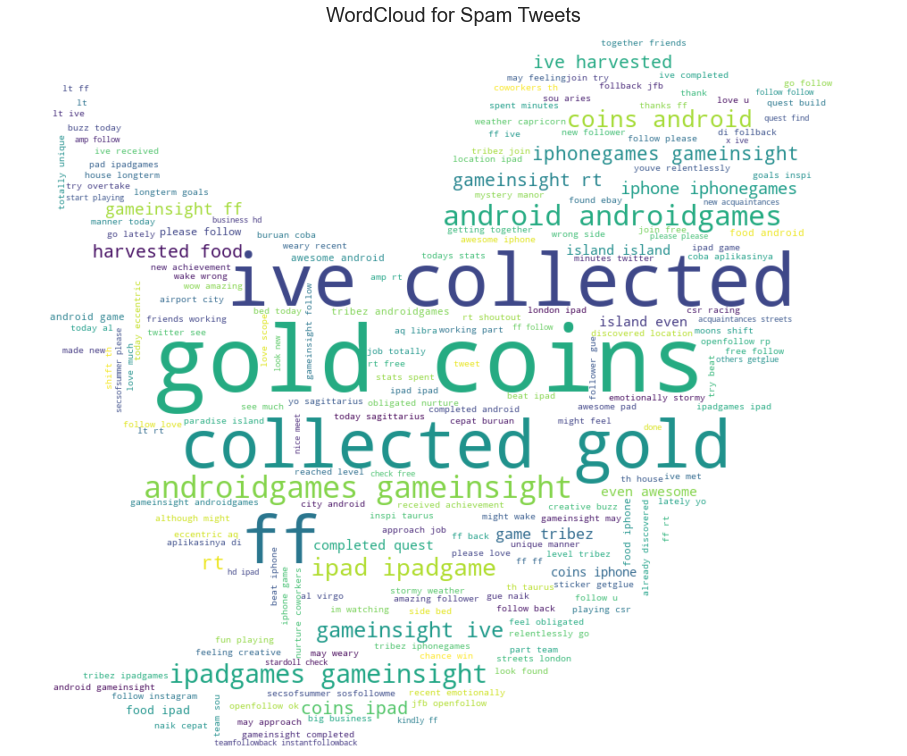

In [41]:
plt_wordcloud(df_spam, "tweet_clean")